# Laterality Models using Stat Features
# REPLACE DESCRIPTION!
This notebook covers all the process of definition preprocessing, training and evaluation for 3 tremor inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have tremor (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle


from src.settings import ROOT_DIR
from src.model.standard_models_builder import build_models_modules
from src.evaluation.model_metrics_report import print_sklearn_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'laterality-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'laterality-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

14809

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

## Models
Define and train the models using GridSearch

In [5]:
svm, knn, gboost = build_models_modules(X_train, y_train)

Started Grid Search - Model: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters SVM: {'C': 1000, 'kernel': 'rbf'}
Finished Grid Search - Model: SVM
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 5, 'weights': 'distance'}
Finished Grid Search - Model: KNN
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 64, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


## Train Metrics

Accuracy: 0.8241609831859005
0.7000906246136189
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      8005
           1       0.82      0.70      0.75      3791
           2       0.81      0.76      0.79      3013

    accuracy                           0.82     14809
   macro avg       0.82      0.79      0.80     14809
weighted avg       0.82      0.82      0.82     14809
AUC-ROC: 0.9402021947899973


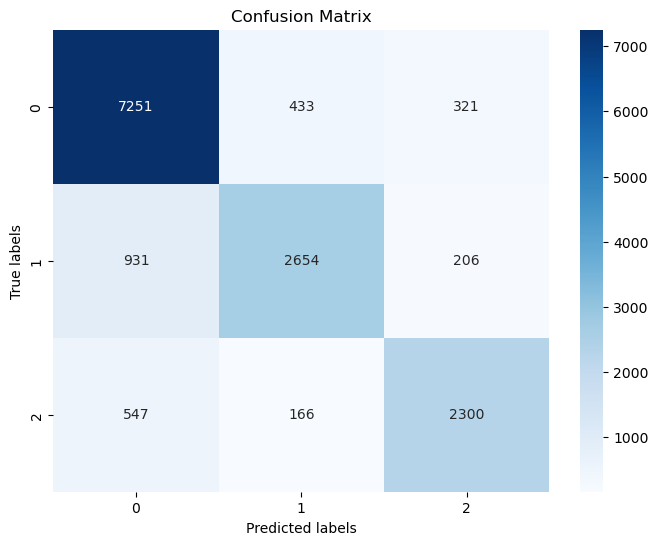

In [6]:
print_sklearn_model_metrics(svm, X_train, y_train.to_numpy(), multiclass=True)

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8005
           1       1.00      1.00      1.00      3791
           2       1.00      1.00      1.00      3013

    accuracy                           1.00     14809
   macro avg       1.00      1.00      1.00     14809
weighted avg       1.00      1.00      1.00     14809
AUC-ROC: 1.0


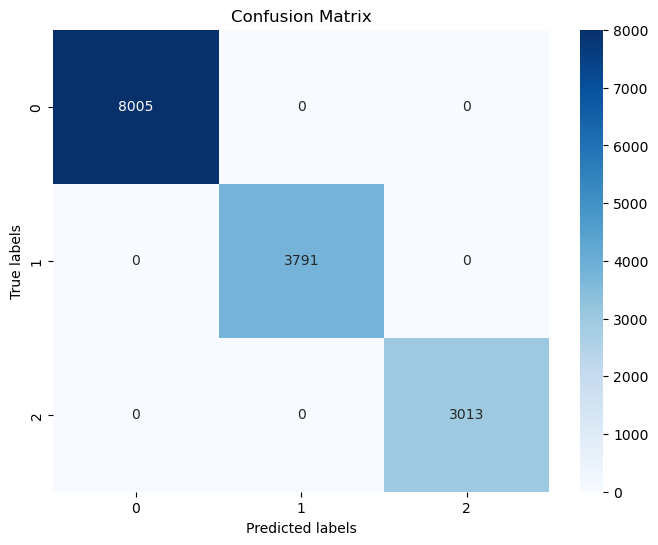

In [7]:
print_sklearn_model_metrics(knn, X_train, y_train, multiclass=True)

Accuracy: 0.764805186035519
0.5930115382820607
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      8005
           1       0.75      0.61      0.67      3791
           2       0.76      0.66      0.70      3013

    accuracy                           0.76     14809
   macro avg       0.76      0.72      0.73     14809
weighted avg       0.76      0.76      0.76     14809

AUC-ROC: 0.9022866568648644


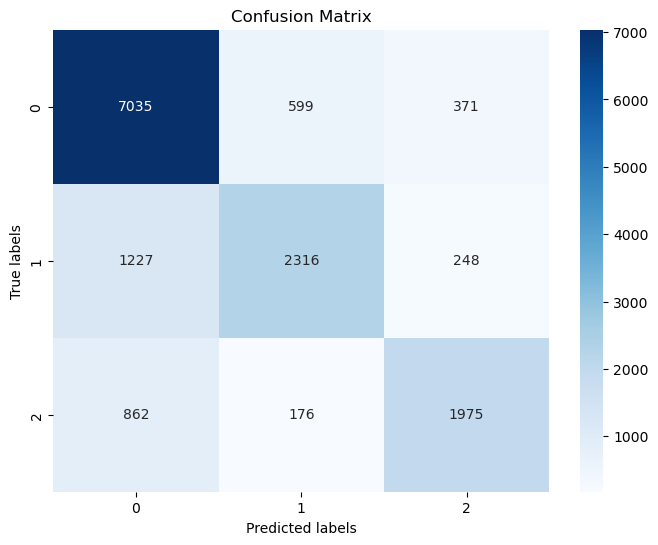

In [8]:
print_sklearn_model_metrics(gboost, X_train, y_train, multiclass=True)

## Val Metrics

Accuracy: 0.7893315327481432
0.6364943692940672
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1606
           1       0.77      0.65      0.71       770
           2       0.80      0.70      0.75       586

    accuracy                           0.79      2962
   macro avg       0.79      0.75      0.76      2962
weighted avg       0.79      0.79      0.79      2962
AUC-ROC: 0.9205879374458711


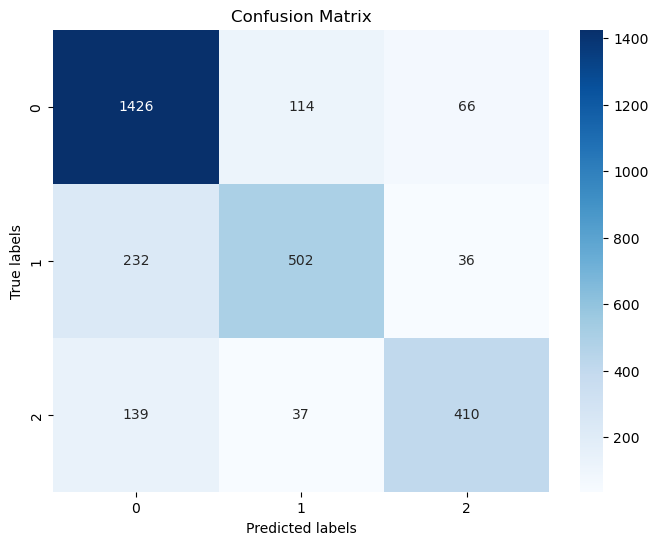

In [12]:
print_sklearn_model_metrics(svm, X_val, y_val, multiclass=True)

Accuracy: 0.8163403106009454
0.6900190683150473
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1606
           1       0.78      0.75      0.76       770
           2       0.80      0.75      0.77       586

    accuracy                           0.82      2962
   macro avg       0.80      0.79      0.80      2962
weighted avg       0.82      0.82      0.82      2962
AUC-ROC: 0.9273991367170344


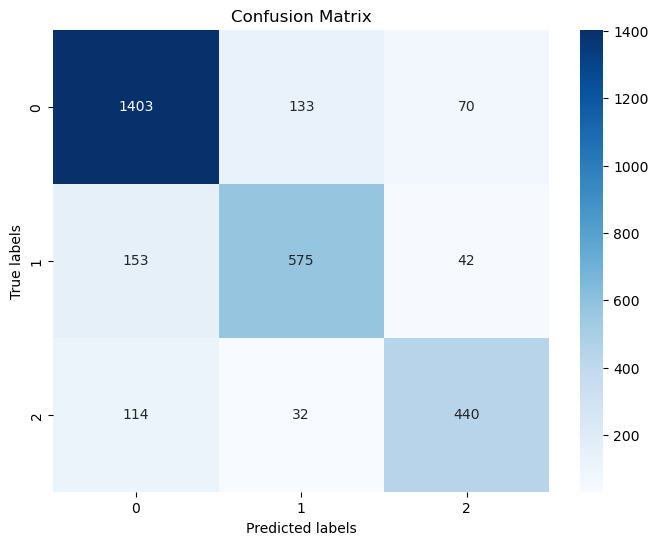

In [13]:
print_sklearn_model_metrics(knn, X_val, y_val, multiclass=True)

Accuracy: 0.7322754895340986
0.5347833182675602
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1606
           1       0.71      0.57      0.63       770
           2       0.71      0.60      0.65       586

    accuracy                           0.73      2962
   macro avg       0.72      0.68      0.69      2962
weighted avg       0.73      0.73      0.73      2962

AUC-ROC: 0.8827679381187208


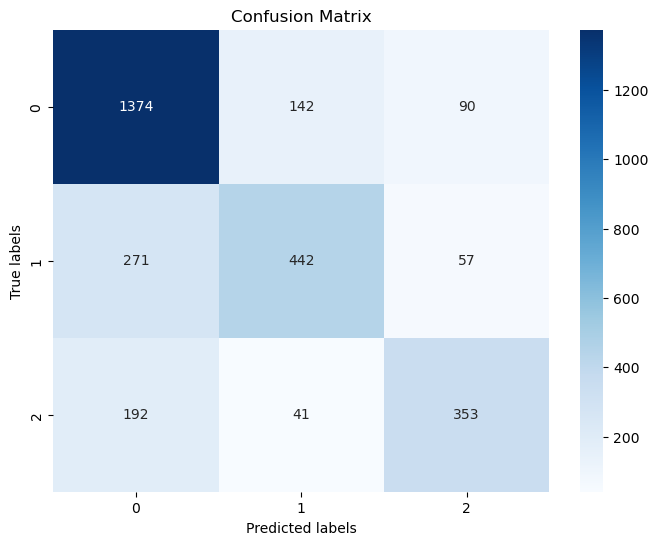

In [14]:
print_sklearn_model_metrics(gboost, X_val, y_val, multiclass=True)

## Save models

In [7]:
save_path = str(ROOT_DIR) + '/results/models/laterality-features/'

os.makedirs(save_path, exist_ok=True)

with open(save_path + 'model.svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
    file.close()
    
with open(save_path + 'model.knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()
    
with open(save_path + 'model.gboost.pkl', 'wb') as file:
    pickle.dump(gboost, file)
    file.close()
    